<a href="https://colab.research.google.com/github/hyanquiv/Fisica-Computacional/blob/main/FC_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Celda 1: Instalación de bibliotecas necesarias
!pip install numpy matplotlib scipy

In [ ]:
# Celda 2: Importación de bibliotecas
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.special import gamma

# Celda 3: Función de transmisión basada en el modelo
def transmission_function(x, a, b, v, r):
    mu_m_0 = 0.02  # Ejemplo de coeficiente de atenuación para el material
    return a * np.exp(-b * x**v) + r * np.exp(-mu_m_0 * x)

# Celda 4: Definir función objetivo para la optimización
def objective_function(params, x_data, y_data):
    a, b, v, r = params
    y_pred = transmission_function(x_data, a, b, v, r)
    error = np.sum((y_pred - y_data)**2)
    return error


In [ ]:
# Celda 5: Datos de ejemplo de transmisión (sustituir con datos reales)
x_data = np.array([0.0, 0.1, 0.2, 0.3, 0.4, 0.5])  # Espesor (cm)
y_data = np.array([1.0, 0.9, 0.8, 0.7, 0.6, 0.5])  # Transmisión normalizada

# Celda 6: Configuración inicial para optimización
initial_guess = [1.0, 0.5, 0.5, 0.5]  # Valores iniciales de a, b, v, r
bounds = [(0, 10), (0, 1), (0, 1), (0, 1)]  # Límites para cada parámetro

# Celda 7: Optimización
result = minimize(objective_function, initial_guess, args=(x_data, y_data), bounds=bounds)
a_opt, b_opt, v_opt, r_opt = result.x

print("Parámetros optimizados:")
print(f"a = {a_opt}, b = {b_opt}, v = {v_opt}, r = {r_opt}")


Parámetros optimizados:
a = 1.0026877824682754, b = 1.0, v = 0.8259940318342337, r = 0.0


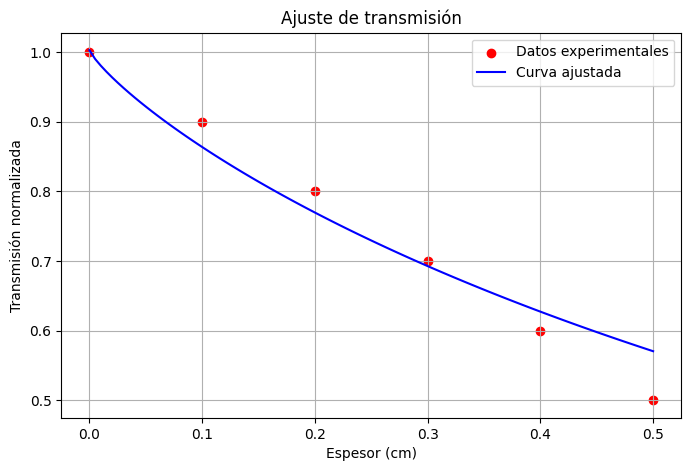

In [ ]:
# Celda 8: Visualización de la curva ajustada
x_fit = np.linspace(0, 0.5, 100)
y_fit = transmission_function(x_fit, a_opt, b_opt, v_opt, r_opt)

plt.figure(figsize=(8, 5))
plt.scatter(x_data, y_data, label="Datos experimentales", color="red")
plt.plot(x_fit, y_fit, label="Curva ajustada", color="blue")
plt.xlabel("Espesor (cm)")
plt.ylabel("Transmisión normalizada")
plt.legend()
plt.title("Ajuste de transmisión")
plt.grid()
plt.show()


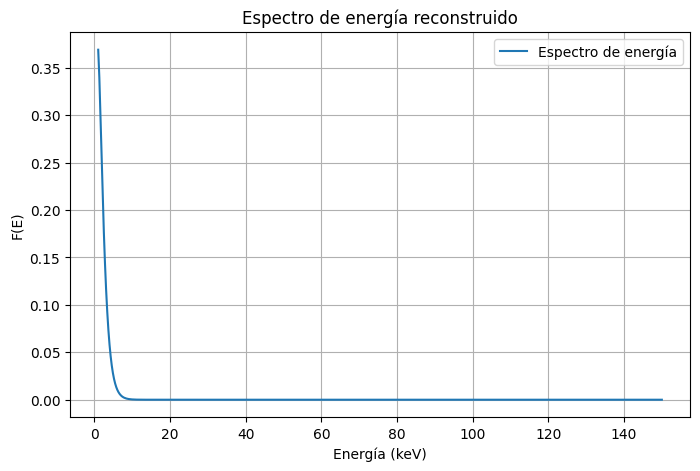

In [ ]:
# Celda 9: Cálculo del espectro de energía F(E)
def energy_spectrum(E, a, b, v, r):
    return a * E**v * np.exp(-b * E) + r * gamma(v) * np.exp(-E)

E = np.linspace(1, 150, 500)  # Energía en keV
F_E = energy_spectrum(E, a_opt, b_opt, v_opt, r_opt)

plt.figure(figsize=(8, 5))
plt.plot(E, F_E, label="Espectro de energía")
plt.xlabel("Energía (keV)")
plt.ylabel("F(E)")
plt.title("Espectro de energía reconstruido")
plt.grid()
plt.legend()
plt.show()
